## Assignment 7 - House Price Prediction

### Data Preprocessing and feature engineering

### Import libraries and load data

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt

# Load the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


### Explore and preprocess the data

In [41]:
# Separate features and target
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

print("Numeric features:", len(numeric_features))
print("Categorical features:", len(categorical_features))


Numeric features: 37
Categorical features: 43
Preprocessing complete. Ready for model training.


In [51]:
# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [53]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [57]:
# Fit the preprocessor to the training data and transform
X_processed = preprocessor.fit_transform(X)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Preprocessing complete. Ready for model training.")

Preprocessing complete. Ready for model training.


### Train and evaluate Linear Regression model

In [43]:
# Create and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
lr_train_pred = lr_model.predict(X_train)
lr_val_pred = lr_model.predict(X_val)

# Evaluate the model
lr_train_mse = mean_squared_error(y_train, lr_train_pred)
lr_val_mse = mean_squared_error(y_val, lr_val_pred)
lr_train_r2 = r2_score(y_train, lr_train_pred)
lr_val_r2 = r2_score(y_val, lr_val_pred)

print("Linear Regression Results:")
print(f"Train MSE: {lr_train_mse:.2f}")
print(f"Validation MSE: {lr_val_mse:.2f}")
print(f"Train R2: {lr_train_r2:.2f}")
print(f"Validation R2: {lr_val_r2:.2f}")

Linear Regression Results:
Train MSE: 357354639.40
Validation MSE: 4269799606.06
Train R2: 0.94
Validation R2: 0.44


### Train and evaluate Random Forest model

In [45]:
# Create and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_train_pred = rf_model.predict(X_train)
rf_val_pred = rf_model.predict(X_val)

# Evaluate the model
rf_train_mse = mean_squared_error(y_train, rf_train_pred)
rf_val_mse = mean_squared_error(y_val, rf_val_pred)
rf_train_r2 = r2_score(y_train, rf_train_pred)
rf_val_r2 = r2_score(y_val, rf_val_pred)

print("Random Forest Results:")
print(f"Train MSE: {rf_train_mse:.2f}")
print(f"Validation MSE: {rf_val_mse:.2f}")
print(f"Train R2: {rf_train_r2:.2f}")
print(f"Validation R2: {rf_val_r2:.2f}")

Random Forest Results:
Train MSE: 121189750.52
Validation MSE: 833648030.57
Train R2: 0.98
Validation R2: 0.89


### Train and evaluate XGBoost model

In [47]:
# Create and train XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_train_pred = xgb_model.predict(X_train)
xgb_val_pred = xgb_model.predict(X_val)

# Evaluate the model
xgb_train_mse = mean_squared_error(y_train, xgb_train_pred)
xgb_val_mse = mean_squared_error(y_val, xgb_val_pred)
xgb_train_r2 = r2_score(y_train, xgb_train_pred)
xgb_val_r2 = r2_score(y_val, xgb_val_pred)

print("XGBoost Results:")
print(f"Train MSE: {xgb_train_mse:.2f}")
print(f"Validation MSE: {xgb_val_mse:.2f}")
print(f"Train R2: {xgb_train_r2:.2f}")
print(f"Validation R2: {xgb_val_r2:.2f}")

XGBoost Results:
Train MSE: 28541872.82
Validation MSE: 652398223.48
Train R2: 1.00
Validation R2: 0.91


### Compare model performances

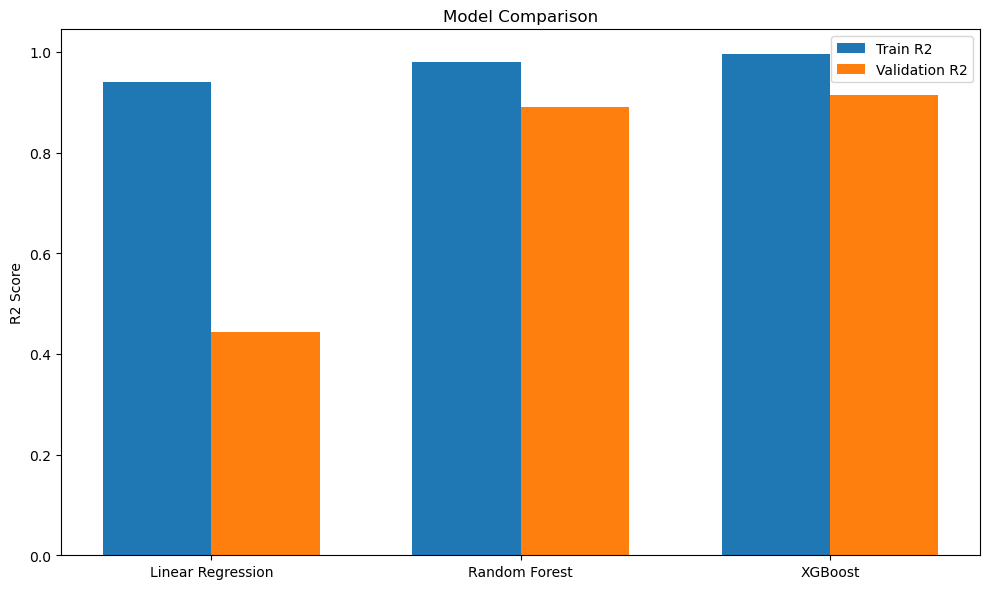

Model Comparison:
Linear Regression: Train R2 = 0.9401, Validation R2 = 0.4433
Random Forest: Train R2 = 0.9797, Validation R2 = 0.8913
XGBoost: Train R2 = 0.9952, Validation R2 = 0.9149


In [49]:
models = ['Linear Regression', 'Random Forest', 'XGBoost']
train_r2 = [lr_train_r2, rf_train_r2, xgb_train_r2]
val_r2 = [lr_val_r2, rf_val_r2, xgb_val_r2]

plt.figure(figsize=(10, 6))
x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, train_r2, width, label='Train R2')
plt.bar(x + width/2, val_r2, width, label='Validation R2')

plt.ylabel('R2 Score')
plt.title('Model Comparison')
plt.xticks(x, models)
plt.legend()

plt.tight_layout()
plt.show()

print("Model Comparison:")
for model, train, val in zip(models, train_r2, val_r2):
    print(f"{model}: Train R2 = {train:.4f}, Validation R2 = {val:.4f}")